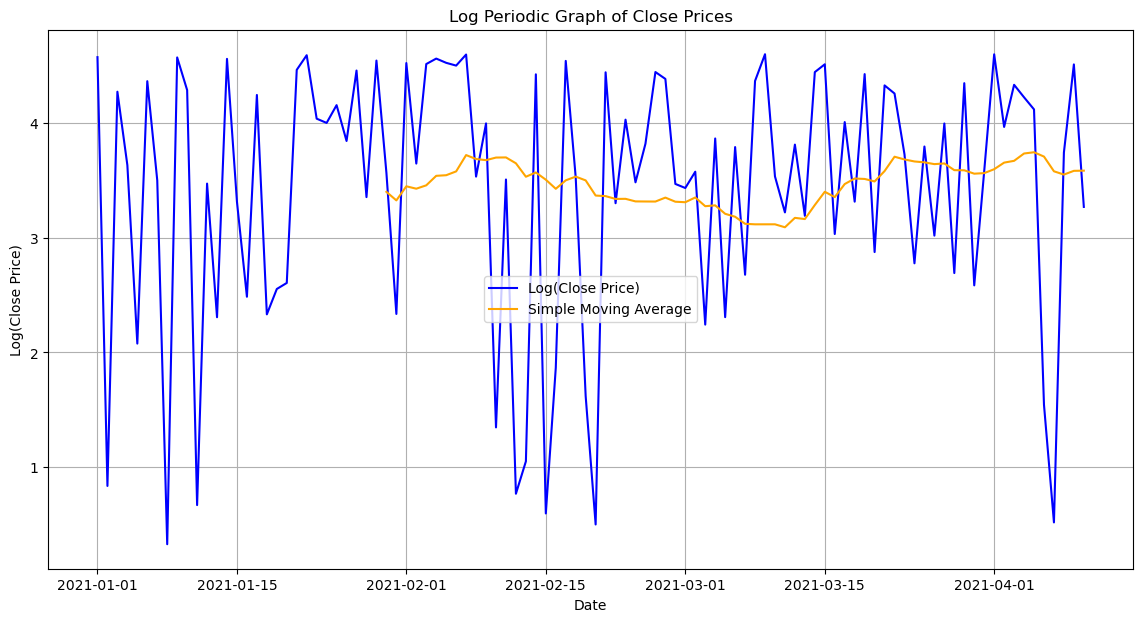

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the log periodic graph
def plot_log_periodic_graph(df):
    # Ensure the DataFrame contains the necessary columns
    required_columns = ['date', 'close']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Convert 'date' column to datetime if it's not already
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by date
    df = df.sort_values('date')

    # Calculate the logarithm of the closing prices
    df['log_close'] = np.log(df['close'])

    # Plot the log prices
    plt.figure(figsize=(14, 7))
    plt.plot(df['date'], df['log_close'], label='Log(Close Price)', color='blue')
    
    # Calculate a simple moving average to help identify potential bubbles
    window_size = 30  # You can adjust the window size
    df['SMA'] = df['log_close'].rolling(window=window_size).mean()

    # Plot the moving average
    plt.plot(df['date'], df['SMA'], label='Simple Moving Average', color='orange')

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Log(Close Price)')
    plt.title('Log Periodic Graph of Close Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
        'open': np.random.rand(100) * 100,
        'high': np.random.rand(100) * 100,
        'low': np.random.rand(100) * 100,
        'close': np.random.rand(100) * 100,
        'volume': np.random.randint(1, 1000, 100),
        'adjusted_volume': np.random.randint(1, 1000, 100)
    }
    df = pd.DataFrame(data)

    # Plot the log periodic graph
    plot_log_periodic_graph(df)


In [12]:
# import all the unclean data for aal five stocks into separate variables 
uDataAmazon = pd.read_csv('./data/Amazon.csv', index_col = False)
uDataApple = pd.read_csv('./data/Apple.csv')
uDataGoogle = pd.read_csv('./data/Google.csv')
uDataNetflix = pd.read_csv('./data/Netflix.csv')
uDataMicrosoft = pd.read_csv('./data/Microsoft.csv')

# combine all the temp data values into a list to perform mapping operations
uDataList = [ uDataAmazon, uDataApple, uDataGoogle, uDataMicrosoft, uDataNetflix ]

In [13]:
# clean data of amazon
cDataAmazon = uDataAmazon[['Date', 'Close']]
tempDataAmazon = cDataAmazon.copy()
cDataAmazon

,Date,Close
0,2000-01-03,4.468750
1,2000-01-04,4.096875
2,2000-01-05,3.487500
3,2000-01-06,3.278125
4,2000-01-07,3.478125
...,...,...
5834,2023-03-13,92.430000
5835,2023-03-14,94.879997
5836,2023-03-15,96.199997
5837,2023-03-16,100.040001


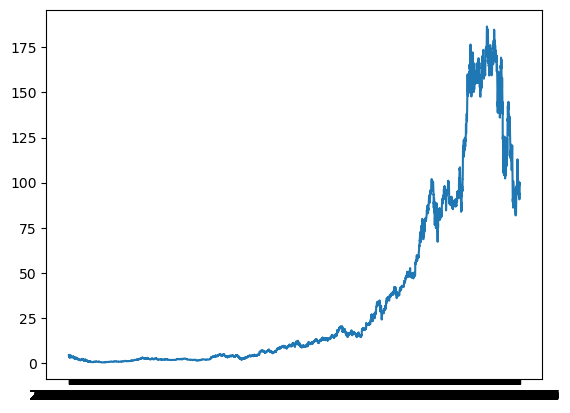

In [14]:
plt.plot(tempDataAmazon['Date'], tempDataAmazon['Close'])
plt.show()

In [15]:
df = pd.read_csv('stock_symbols.csv')
df.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$130.57,-2.5900,-1.945%,3.809522e+10,United States,1999.0,2555441,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$38.54,-1.1700,-2.946%,6.920230e+09,United States,2016.0,4358445,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.81,-0.0400,-4.706%,2.592010e+07,China,2008.0,2922,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.465,0.0600,0.526%,0.000000e+00,United States,2021.0,15832,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1217,0.0107,9.64%,0.000000e+00,United States,2021.0,46030,Finance,Blank Checks


In [17]:
with open('symbols.txt', 'w') as file:
    for i in range(len(symbols)):
        name = names[i].replace("'",'')
        sector = str(sectors[i]).replace("'",'')
        line = f"{{ 'symbol': '{symbols[i]}', 'name': '{name}', 'sector': '{sector}'}}"
        file.write(line + ',\n')

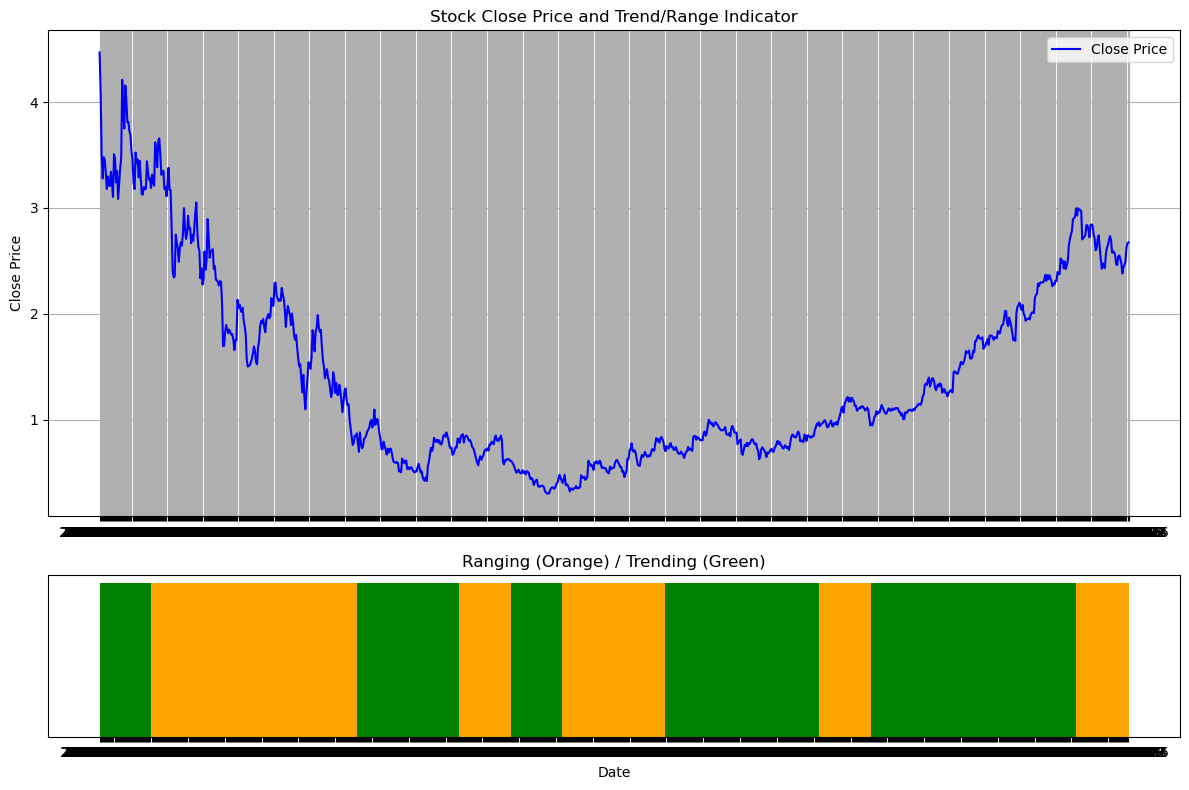

In [18]:
def check_trend_or_range(df, num_divisions):
    # Ensure data is sorted by date
    df = df.sort_values('Date').reset_index(drop=True)
    
    # Determine the number of rows per division
    rows_per_division = len(df) // num_divisions
    
    results = []
    labels = []

    for i in range(num_divisions):
        # Select the division's data
        start_idx = i * rows_per_division
        end_idx = (i + 1) * rows_per_division if i < num_divisions - 1 else len(df)
        division_data = df.iloc[start_idx:end_idx]
        
        # Calculate trend and range metrics
        start_price = division_data['Close'].iloc[0]
        end_price = division_data['Close'].iloc[-1]
        high_price = division_data['High'].max()
        low_price = division_data['Low'].min()
        
        trend = end_price - start_price
        price_range = high_price - low_price
        
        # Define a simple rule to determine trend vs range
        if abs(trend) > 0.5 * price_range:
            results.extend(['Trending'] * len(division_data))
            labels.append('Trending')
        else:
            results.extend(['Ranging'] * len(division_data))
            labels.append('Ranging')
    
    df['Trend_Range'] = results
    return df, labels


# Divide data into 5 equal divisions and check for trend or range
num_divisions = 20
df, labels = check_trend_or_range(uDataAmazon[1000::-1], num_divisions)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Line chart for Close price
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_title('Stock Close Price and Trend/Range Indicator')
ax1.set_ylabel('Close Price')
ax1.legend()
ax1.grid(True)

# Bar chart for Trend/Range status
colors = ['orange' if label == 'Ranging' else 'green' for label in df['Trend_Range']]
ax2.bar(df['Date'], [1] * len(df), color=colors, width=1.0)
ax2.set_yticks([])
ax2.set_xlabel('Date')
ax2.set_title('Ranging (Orange) / Trending (Green)')

plt.tight_layout()
plt.show()


In [19]:
window_size = 20
df['Moving_Average'] = df['Close'].rolling(window=window_size).mean()


In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,Date,Trend_Range,Moving_Average
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03,Trending,NaN
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04,Trending,NaN
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05,Trending,NaN
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06,Trending,NaN
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07,Trending,NaN
...,...,...,...,...,...,...,...,...,...
996,2.440000,2.470500,2.413000,2.462000,2.462000,160918000,2003-12-19,Ranging,2.549125
997,2.449000,2.505000,2.435000,2.494500,2.494500,155994000,2003-12-22,Ranging,2.552400
998,2.501000,2.631000,2.488500,2.624000,2.624000,220080000,2003-12-23,Ranging,2.555275
999,2.615000,2.694000,2.607500,2.666000,2.666000,113196000,2003-12-24,Ranging,2.557400


<Axes: xlabel='Date'>

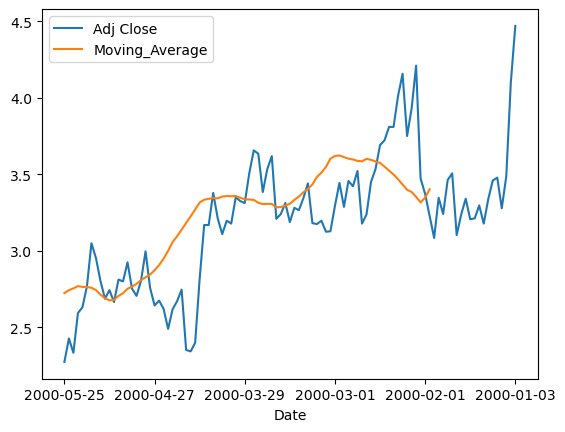

In [28]:
df[100::-1].plot('Date',['Adj Close','Moving_Average'])